In [2]:
import os
import json
import math

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

In [3]:
path = 'save_results_completion_permutations_{len}_scrambled_prefs.json'

In [4]:
res = json.load(open(path, 'r'))

In [5]:
len(res['permutations'])

930

In [6]:
list_outputs = []
permutations = []
justifications = []
for (i1, lo), (i2, p) in zip(res['list_outputs'], res['permutations']):
    if len(lo) == 5:
        list_outputs.append((i1, lo))
        permutations.append((i2, p))
len(list_outputs)

930

In [17]:
def apply_permutation(l, perm):
    return [l[i] for i in perm]

In [7]:
res['list_outputs'] = list_outputs
res['permutations'] = permutations

In [8]:
len(res['permutations'])

930

In [9]:
res['list_outputs']

[(0, [0, 3, 4, 1, 2]),
 (2, [4, 1, 0, 3, 2]),
 (3, [0, 4, 1, 2, 3]),
 (4, [2, 4, 0, 3, 1]),
 (5, [1, 2, 3, 0, 4]),
 (6, [0, 1, 2, 3, 4]),
 (8, [0, 2, 3, 4, 1]),
 (9, [2, 4, 0, 3, 1]),
 (10, [1, 4, 2, 0, 3]),
 (11, [0, 2, 3, 4, 1]),
 (13, [1, 3, 2, 0, 4]),
 (14, [4, 0, 3, 2, 1]),
 (15, [0, 2, 1, 4, 3]),
 (16, [4, 2, 0, 3, 1]),
 (17, [3, 4, 0, 2, 1]),
 (18, [2, 3, 0, 1, 4]),
 (19, [2, 3, 4, 0, 1]),
 (20, [0, 2, 4, 3, 1]),
 (21, [2, 0, 1, 3, 4]),
 (22, [0, 3, 4, 1, 2]),
 (23, [0, 4, 2, 3, 1]),
 (24, [0, 1, 2, 3, 4]),
 (25, [0, 1, 2, 3, 4]),
 (26, [0, 3, 2, 1, 4]),
 (27, [3, 2, 0, 1, 4]),
 (28, [2, 0, 3, 4, 1]),
 (29, [2, 3, 4, 0, 1]),
 (30, [0, 3, 4, 1, 2]),
 (31, [0, 1, 2, 3, 4]),
 (32, [0, 2, 4, 1, 3]),
 (33, [0, 2, 1, 3, 4]),
 (34, [0, 2, 3, 4, 1]),
 (35, [0, 1, 2, 3, 4]),
 (36, [2, 0, 1, 4, 3]),
 (37, [0, 2, 1, 3, 4]),
 (38, [0, 2, 3, 4, 1]),
 (40, [0, 4, 2, 3, 1]),
 (41, [2, 1, 4, 0, 3]),
 (42, [0, 2, 1, 3, 4]),
 (43, [0, 2, 1, 3, 4]),
 (44, [0, 3, 1, 4, 2]),
 (45, [4, 2, 0, 3, 1]),


In [10]:
res['puz_ids']

[[1, 2, 0, 6, 3],
 [3, 6, 1, 2, 5],
 [2, 5, 3, 4, 7],
 [5, 7, 6, 3, 2],
 [1, 4, 2, 7, 3],
 [5, 3, 6, 1, 7],
 [1, 3, 2, 4, 6],
 [0, 6, 1, 5, 3],
 [3, 5, 4, 2, 6],
 [0, 3, 5, 7, 4],
 [4, 0, 6, 7, 1],
 [5, 7, 6, 0, 3],
 [3, 0, 7, 4, 2],
 [6, 4, 0, 1, 3],
 [1, 2, 7, 5, 4],
 [4, 0, 5, 3, 7],
 [3, 6, 5, 7, 4],
 [2, 5, 4, 3, 0],
 [6, 1, 3, 4, 0],
 [0, 2, 5, 7, 4],
 [0, 7, 6, 1, 4],
 [3, 7, 1, 6, 4],
 [4, 2, 5, 1, 6],
 [4, 3, 0, 7, 5],
 [5, 4, 1, 3, 6],
 [5, 4, 1, 6, 0],
 [3, 1, 4, 0, 6],
 [4, 2, 0, 3, 1],
 [2, 6, 1, 4, 7],
 [5, 7, 6, 1, 4],
 [5, 4, 3, 2, 7],
 [1, 6, 0, 5, 7],
 [3, 0, 4, 1, 2],
 [6, 2, 0, 5, 7],
 [7, 1, 2, 6, 4],
 [3, 4, 7, 0, 6],
 [7, 0, 4, 1, 3],
 [7, 0, 5, 6, 3],
 [0, 1, 7, 3, 6],
 [5, 2, 6, 7, 3],
 [2, 0, 7, 3, 1],
 [1, 3, 4, 5, 2],
 [0, 6, 5, 7, 3],
 [6, 4, 2, 5, 0],
 [5, 7, 1, 3, 4],
 [7, 3, 2, 0, 4],
 [3, 1, 5, 4, 0],
 [7, 3, 2, 4, 1],
 [6, 7, 5, 0, 2],
 [3, 5, 0, 7, 1],
 [3, 2, 6, 4, 5],
 [0, 1, 3, 6, 2],
 [2, 0, 4, 7, 3],
 [4, 5, 7, 1, 3],
 [4, 6, 0, 5, 3],
 [4, 7, 0,

In [11]:
# for the pref version
puzzle_mapping = {
    0: 1,
    1: 1,
    2: 0,
    3: 0,
    4: 2,
    5: 2, 
    6: 3,
    7: 3
}

In [12]:
ptype_names = {
    0: 'Bad',
    1: 'Hard',
    2: 'Trivial',
    3: 'Appropriate',
}

In [13]:
len(res['unique'])

110

In [14]:
print(f'{len(res["unique"]) / math.factorial(5) * 100:.2f}% of permutations are filled.')

91.67% of permutations are filled.


In [15]:
perms = [p for _, p in res['list_outputs']]

In [32]:
i = 4

In [20]:
# test the unscrambling thingy
perm0 = perms[i]
pid0 = res['puz_ids'][i]

In [33]:
# to get the indices of the puzzles we need to
# apply the preference permutation to the random permutation
# then apply this permutation to the puzzle ids

prefs_permuted = apply_permutation(res['permutations'][i][1], res['list_outputs'][i][1])
actual_prefs = apply_permutation(res['puz_ids'][i], prefs_permuted)
actual_prefs

[1, 2, 3, 4, 7]

In [34]:
print(res['justifications'][i][1])

Based on the evaluation criteria, here is the ranking of the puzzles:

1. Puzzle xrHF: This puzzle involves a game called Nim and requires the player to implement a strategy to beat a bot. It provides an opportunity for learning about game strategies and logical thinking. It is of appropriate difficulty for the course and can be engaging for students.

2. Puzzle WeSh: This puzzle checks if a given list is sorted. It is a simple problem that can be easily understood and solved. It provides an opportunity for learning about list manipulation and conditionals. It is of appropriate difficulty for the course and can be engaging for students.

3. Puzzle ChIX: This puzzle checks if two words are anagrams. It involves string manipulation and sorting. It is a relatively simple problem that can be understood and solved with some effort. It provides an opportunity for learning about string manipulation and sorting algorithms. It is of appropriate difficulty for the course and can be engaging for 

In [22]:
res['puz_ids'][i]

[2, 5, 3, 4, 7]

In [53]:
puz_ids_in_order = [res['puz_ids'][i][j] for j in perms[i]]
puz_ids_in_order

[2, 7, 5, 3, 4]

In [59]:
res['list_outputs'][1]

(2, [4, 1, 0, 3, 2])

In [61]:
# [1, 6, 3, 2, 0]?
print(res['justifications'][i][1])

Based on the evaluation criteria, here is the ranking of the puzzles:

1. Puzzle "rdji":
   - Clarity: The problem description is clear and easy to understand.
   - Opportunity for learning: Students can learn about anagram checking and sorting in Python.
   - Difficulty appropriate for the course: The puzzle is of moderate difficulty, suitable for second-year undergraduate students.
   - Engagement: The puzzle is interesting as it involves checking anagrams.

2. Puzzle "tRVi":
   - Clarity: The problem description is clear and easy to understand.
   - Opportunity for learning: Students can learn about checking if a list is sorted in Python.
   - Difficulty appropriate for the course: The puzzle is of moderate difficulty, suitable for second-year undergraduate students.
   - Engagement: The puzzle is interesting as it involves checking if a list is sorted.

3. Puzzle "MZAq":
   - Clarity: The problem description is clear and easy to understand.
   - Opportunity for learning: Students c

In [35]:
def plot_permutations_pref(results, perms, puz_ids, n_positions=5, indices=4, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n_positions, indices))
    puz_types = []
    for perm, pid, result in zip(perms, puz_ids, results):

        prefs_permuted = apply_permutation(perm, result)
        actual_prefs = apply_permutation(pid, prefs_permuted)
        puzzle_type = [puzzle_mapping[p] for p in actual_prefs]
        puz_types.append(puzzle_type)

    # Iterate over each permutation
    for perm in puz_types:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n_positions)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(indices):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=ptype_names[i],
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n_positions)])
    ax.legend()

    plt.tight_layout()
    plt.show()

In [36]:
for i, (r0, r1) in enumerate(zip(res['list_outputs'], res['permutations'])):
    if not r0[0] == r1[0]:
        print(i)

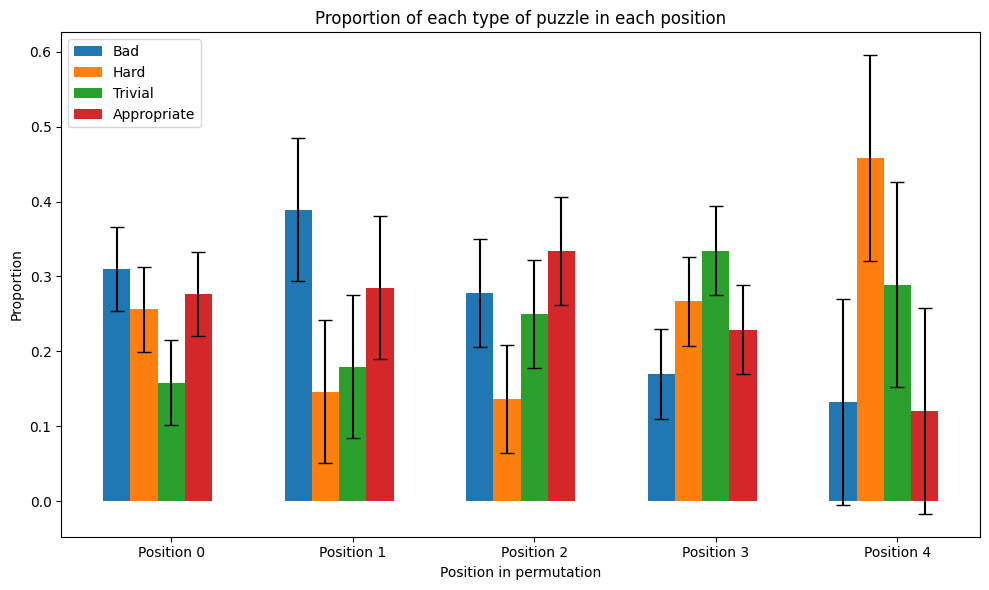

In [39]:
plot_permutations_pref(
    [r[1] for r in res['list_outputs']],
    [r[1] for r in res['permutations']],
    res['puz_ids'],
    title='Proportion of each type of puzzle in each position',
)

In [40]:
# are there any biases in absolute order?
# Thank mr chatgpt
def plot_permutations(perms, n=5, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n, n))

    # Iterate over each permutation
    for perm in perms:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(5):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=f'Index {i}',
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n)])
    ax.legend()

    plt.tight_layout()
    plt.show()

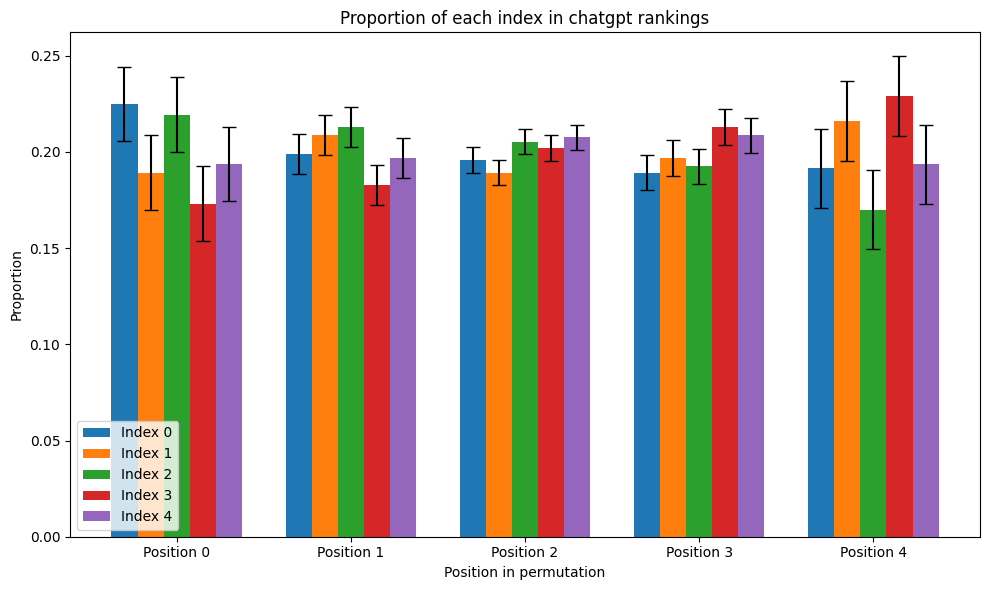

In [42]:
plot_permutations(
    [r[1] for r in res['permutations']],
    title='Proportion of each index in chatgpt rankings'
)

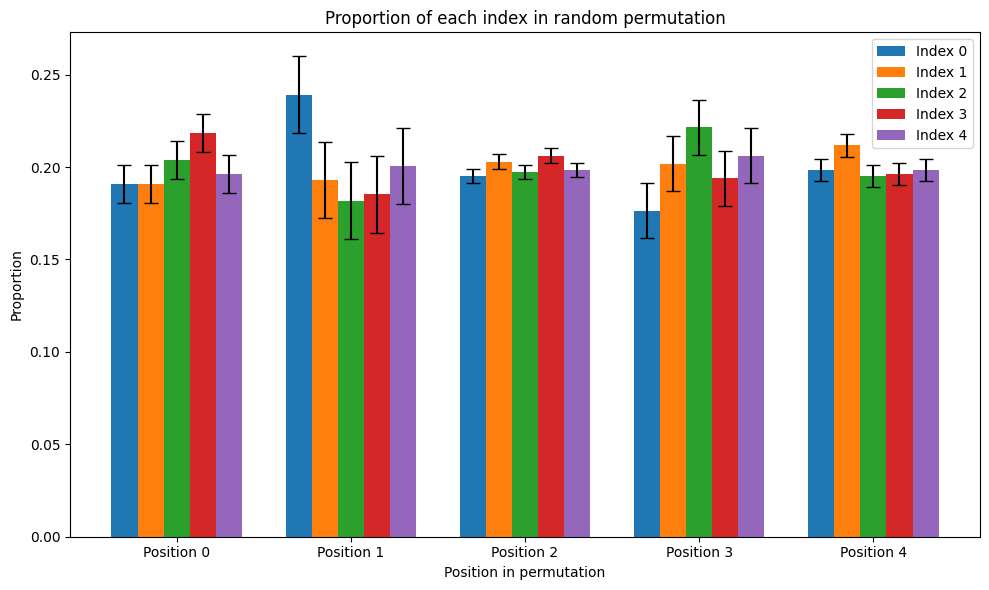

In [15]:
# ground truth permutation stats
perms_gt = [p for _, p in res['permutations']]
plot_permutations(perms_gt, title='Proportion of each index in random permutation')

In [16]:
len(perms)

907

In [18]:
l = [2, 3, 0, 4, 1]
perm = [0, 1, 2, 3, 4]
apply_permutation(l, perm)

[2, 3, 0, 4, 1]

In [19]:
apply_permutation(l, [4, 3, 2, 1, 0])

[1, 4, 0, 3, 2]

In [20]:
print(len(res['permutations']))
print(len(res['list_outputs']))

907
907


In [21]:
actual_rankings = [apply_permutation(l, perm) for (_, l), (_, perm) in zip(res['list_outputs'], res['permutations'])]

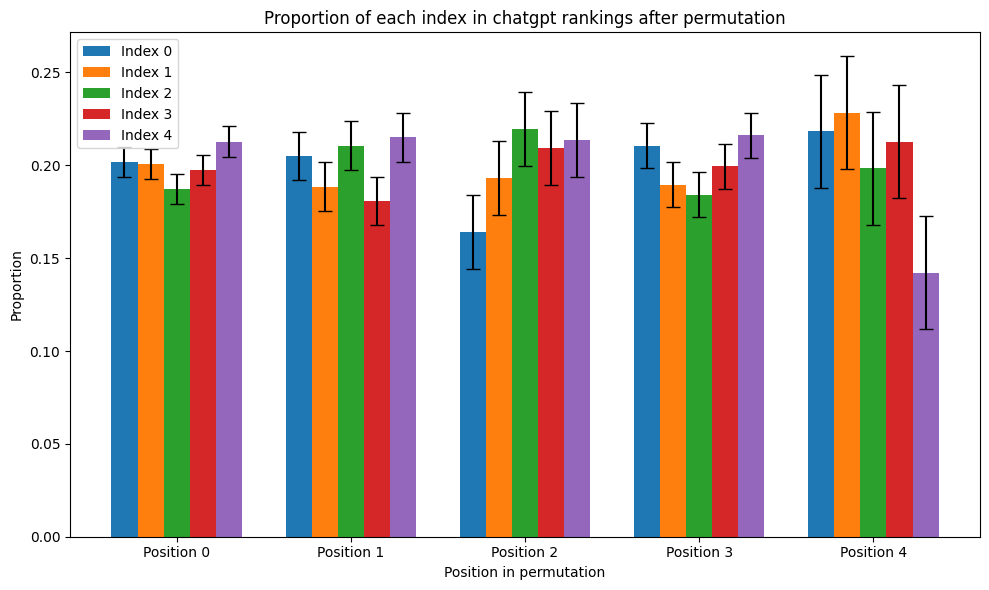

In [22]:
plot_permutations(actual_rankings, title='Proportion of each index in chatgpt rankings after permutation')

In [59]:
print(all([len(perm) == 5 for _, perm in res['list_outputs']]))

True


In [113]:
# rank permutations by count
def perm_to_str(perm):
    return ''.join([str(el) for el in perm])

perm_counter = Counter()
for _, p in res['list_outputs']:
    perm_counter[perm_to_str(p)] += 1

In [114]:
# rank permutations by least to most likely
sorted_perms = sorted(list(perm_counter.items()), key=lambda x: x[1])[::-1]

In [117]:
sorted_perms

[('23104', 22),
 ('21403', 21),
 ('13402', 19),
 ('23401', 18),
 ('23041', 17),
 ('21304', 17),
 ('41023', 17),
 ('24031', 17),
 ('24301', 16),
 ('20314', 16),
 ('41032', 16),
 ('21034', 16),
 ('30214', 15),
 ('02314', 14),
 ('14203', 14),
 ('23014', 14),
 ('30124', 14),
 ('14302', 14),
 ('32041', 14),
 ('20134', 13),
 ('20413', 13),
 ('24013', 13),
 ('31402', 12),
 ('01324', 12),
 ('14023', 12),
 ('14032', 12),
 ('02134', 11),
 ('21043', 11),
 ('24103', 11),
 ('01234', 11),
 ('32014', 11),
 ('20431', 10),
 ('20341', 10),
 ('31204', 10),
 ('13042', 10),
 ('41302', 10),
 ('12403', 9),
 ('21430', 9),
 ('13024', 9),
 ('10324', 9),
 ('23140', 9),
 ('31024', 9),
 ('31420', 9),
 ('32104', 9),
 ('24130', 8),
 ('42031', 8),
 ('30412', 8),
 ('10234', 8),
 ('12304', 8),
 ('14230', 8),
 ('32401', 8),
 ('42103', 7),
 ('34201', 7),
 ('40213', 7),
 ('20143', 7),
 ('34102', 7),
 ('12340', 7),
 ('02143', 6),
 ('12034', 6),
 ('24310', 6),
 ('13420', 6),
 ('02413', 6),
 ('40123', 6),
 ('40132', 6),
 ('0

In [89]:
perm_counter['01234']

1

In [61]:
uperms = []
for p in res['permutations']:
    if p not in uperms:
        uperms.append(p)

print(len(uperms) / len(res['permutations']))

1.0


In [75]:
rng_perms = json.load(open('chatgpt_rng.json'))

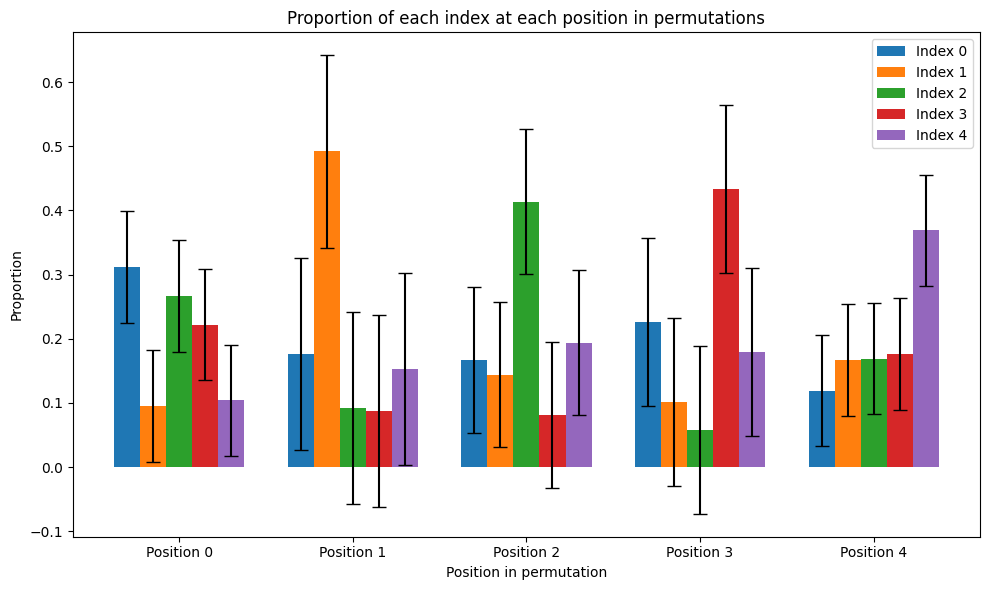

In [76]:
plot_permutations([p for _, p in rng_perms])

In [69]:
len(rng_perms)

100

In [70]:
urng_perms = []
for _, p in rng_perms:
    if p not in urng_perms:
        urng_perms.append(p)
print(len(urng_perms))

38


In [77]:
perm_counter = Counter()
for _, p in rng_perms:
    perm_counter[perm_to_str(p)] += 1
sorted_perms = sorted(list(perm_counter.items()), key=lambda x: x[1])[::-1]

In [78]:
sorted_perms

[('01234', 312),
 ('31402', 44),
 ('24031', 28),
 ('24103', 26),
 ('20413', 25),
 ('30241', 24),
 ('21403', 24),
 ('13042', 21),
 ('24130', 21),
 ('31042', 17),
 ('32041', 16),
 ('42103', 16),
 ('20431', 15),
 ('40213', 14),
 ('23041', 14),
 ('30142', 14),
 ('30412', 14),
 ('30421', 14),
 ('14203', 14),
 ('21430', 13),
 ('21304', 11),
 ('21340', 11),
 ('42130', 10),
 ('23140', 10),
 ('14032', 10),
 ('20341', 10),
 ('32140', 9),
 ('31204', 9),
 ('21043', 9),
 ('24310', 8),
 ('31240', 8),
 ('42031', 8),
 ('42013', 8),
 ('41302', 8),
 ('34102', 7),
 ('20143', 7),
 ('23104', 7),
 ('32401', 7),
 ('41203', 7),
 ('30214', 7),
 ('14302', 7),
 ('24301', 7),
 ('13402', 7),
 ('23401', 6),
 ('13240', 6),
 ('40321', 6),
 ('34021', 5),
 ('24013', 5),
 ('41023', 5),
 ('31420', 5),
 ('20314', 5),
 ('10423', 5),
 ('32104', 4),
 ('14023', 4),
 ('40312', 4),
 ('31024', 3),
 ('10432', 3),
 ('12430', 3),
 ('40132', 3),
 ('13204', 3),
 ('32410', 3),
 ('21034', 3),
 ('34201', 3),
 ('34120', 3),
 ('43102', 3)